# Intalacion e importacion de librerias


In [3]:
!pip install mysql-connector-python
!pip install matplotlib

In [2]:
import matplotlib.pyplot as plt
import mysql.connector
import pandas as pd 
import seaborn as sns
import numpy as np
import sqlite3

# Creacion de la base de datos 

In [5]:
conn= mysql.connector.connect(user="root", password="", host="localhost")
cursor=conn.cursor()
query= "CREATE DATABASE Proyecto_Gestion_BD_1"
cursor.execute(query)
conn.close()

# Creacion de tabla

In [6]:
conn= mysql.connector.connect(user="root", password="", host="localhost", database="Proyecto_Gestion_BD_1")
cursor=conn.cursor()
query= query = """CREATE TABLE proyect_BD(id INT AUTO_INCREMENT PRIMARY KEY,
        Class VARCHAR(255),
        age VARCHAR(255),
        menopause VARCHAR(255),
        tumor_size VARCHAR(255),
        inv_nodes VARCHAR(255),
        node_caps VARCHAR(255),
        deg_malig INT,
        breast VARCHAR(255),
        breast_quad VARCHAR(255),
        irradiat VARCHAR(255)
    );"""
cursor.execute(query)
conn.commit()
conn.close()

# Envio de data frame a BD MySql

In [7]:
data_frame = pd.read_csv('Proyecto_Gestion_BD.csv')  

conn= mysql.connector.connect(user="root", password="", host="localhost", database="Proyecto_Gestion_BD_1")
cursor=conn.cursor()

def insertar_datos(cursor, df):
    for index, row in df.iterrows():
        cursor.execute("INSERT INTO proyect_BD(Class, age, menopause, tumor_size, inv_nodes, node_caps, deg_malig, breast, breast_quad, irradiat) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s)", (row['Class'], row['age'], row['menopause'], row['tumor-size'], row['inv-nodes'], row['node-caps'], row['deg-malig'], row['breast'], row['breast-quad'], row['irradiat']))

try:
    if conn.is_connected():
        cursor = conn.cursor()

        
        insertar_datos(cursor, data_frame)

        
        conn.commit()

        print("Datos insertados correctamente.")

except mysql.connector.Error as err:
    print("Error:", err)

finally:
    # Cerrar el cursor y la conexión
    if 'cursor' in locals():
        cursor.close()
    if conn.is_connected():
        conn.close()

Datos insertados correctamente.


# Comprobacion de subida del data frame 

In [8]:
conn= mysql.connector.connect(user="root", password="", host="localhost", database="Proyecto_Gestion_BD_1")
cursor=conn.cursor()
try:
    if conn.is_connected():
        cursor = conn.cursor()       
        cursor.execute("SELECT * FROM proyect_BD")        
        resultados = cursor.fetchall()        
        for fila in resultados:
            print(fila)

except mysql.connector.Error as err:
    print("Error:", err)

finally:
   
    if 'cursor' in locals():
        cursor.close()
    if conn.is_connected():
        conn.close()

(1, 'no-recurrence-events', '40-49', 'premeno', '20-24', '0-2', 'no', 2, 'right', 'right_up', 'no')
(2, 'no-recurrence-events', '40-49', 'premeno', '20-24', '0-2', 'no', 2, 'left', 'left_low', 'no')
(3, 'no-recurrence-events', '60-69', 'ge40', '15-19', '0-2', 'no', 2, 'right', 'left_up', 'no')
(4, 'no-recurrence-events', '40-49', 'premeno', '0-4', '0-2', 'no', 2, 'right', 'right_low', 'no')
(5, 'no-recurrence-events', '60-69', 'ge40', '15-19', '0-2', 'no', 2, 'left', 'left_low', 'no')
(6, 'no-recurrence-events', '50-59', 'premeno', '25-29', '0-2', 'no', 2, 'left', 'left_low', 'no')
(7, 'no-recurrence-events', '60-69', 'ge40', '20-24', '0-2', 'no', 1, 'left', 'left_low', 'no')
(8, 'no-recurrence-events', '40-49', 'premeno', '50-54', '0-2', 'no', 2, 'left', 'left_low', 'no')
(9, 'no-recurrence-events', '40-49', 'premeno', '20-24', '0-2', 'no', 2, 'right', 'left_up', 'no')
(10, 'no-recurrence-events', '40-49', 'premeno', '0-4', '0-2', 'no', 3, 'left', 'central', 'no')
(11, 'no-recurrence-

# Creacion de graficos a partir de los datos traidos de la BD

## Grafico de dispersion:
Se realiza este grafico para visualizar la correlacion entre las riables, tumor_size, age y deg_malig.

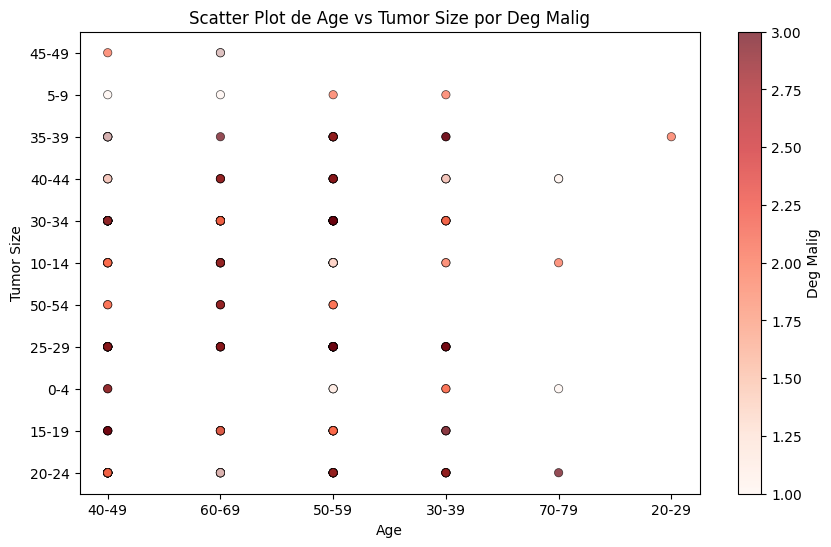

In [9]:
conn = mysql.connector.connect(user="root", password="", host="localhost", database="Proyecto_Gestion_BD_1")
cursor = conn.cursor()

try:
   
    query = "SELECT age, tumor_size, deg_malig FROM proyect_BD"
    cursor.execute(query)   
    columns = ['age', 'tumor_size', 'deg_malig']
    df = pd.DataFrame(cursor.fetchall(), columns=columns)  
    conn.close()

    colors = [(1, 0, 0, 0.5), (1, 0, 0, 0.7), (1, 0, 0, 0.9)]     
    plt.figure(figsize=(10, 6))
    plt.scatter(df['age'], df['tumor_size'], c=df['deg_malig'], cmap='Reds', edgecolor='k', linewidth=0.5, alpha=0.7)
    plt.xlabel('Age')
    plt.ylabel('Tumor Size')
    plt.title('Scatter Plot de Age vs Tumor Size por Deg Malig')
    plt.colorbar(label='Deg Malig')   
    

except mysql.connector.Error as err:
    print("Error:", err)

finally:
   
    if conn.is_connected():
        conn.close()


## Grafico de barras:
Este grafico se realiza con el fin de lizar la correlacion cuando el la malignidad del cancer es 3 con respecto al tamaño del tumor y las edades promedio.

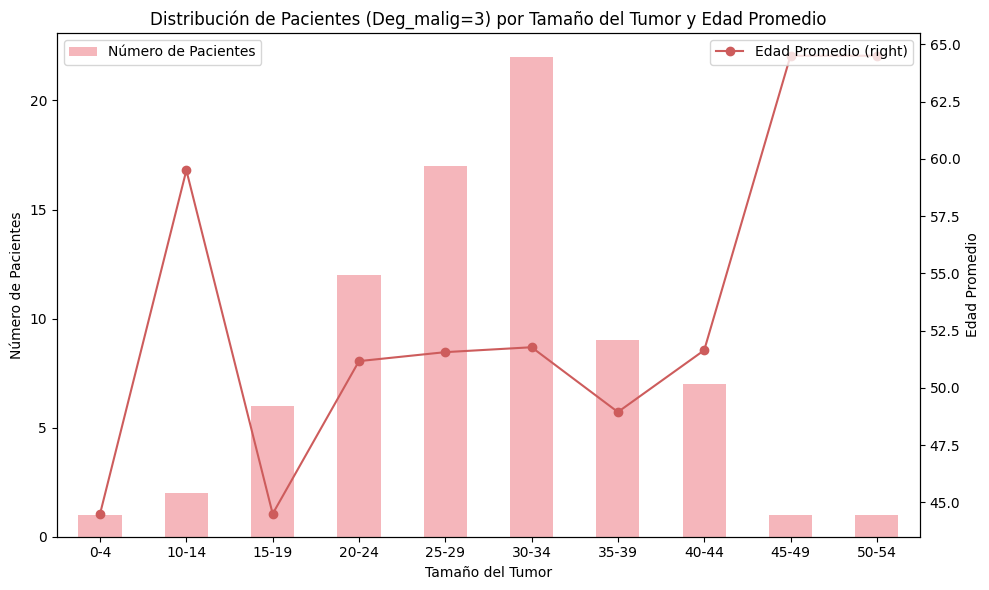

In [14]:
conn = mysql.connector.connect(user="root", password="", host="localhost", database="Proyecto_Gestion_BD_1")
cursor = conn.cursor()

try:   
    query = "SELECT age, tumor_size FROM proyect_BD WHERE deg_malig = 3"
    cursor.execute(query)    
   
    columns = ['age', 'tumor_size']
    df = pd.DataFrame(cursor.fetchall(), columns=columns) 
    df['age'] = df['age'].str.split('-').apply(lambda x: (int(x[0]) + int(x[1])) / 2)    
    tumor_counts = df['tumor_size'].value_counts().sort_index()
    age_means = df.groupby('tumor_size')['age'].mean()    

    bar_color =  (245/255, 182/255, 187/255) 
    line_color = (205/255, 92/255, 92/255)   
    
    fig, ax = plt.subplots(figsize=(10, 6))
    tumor_counts.plot(kind='bar', color=bar_color, ax=ax, label='Número de Pacientes')
    age_means.plot(kind='line', color=line_color, marker='o', ax=ax, secondary_y=True, label='Edad Promedio')
    ax.set_xlabel('Tamaño del Tumor')
    ax.set_ylabel('Número de Pacientes')
    ax.right_ax.set_ylabel('Edad Promedio')
    ax.set_title('Distribución de Pacientes (Deg_malig=3) por Tamaño del Tumor y Edad Promedio')
    ax.legend(loc='upper left')
    ax.right_ax.legend(loc='upper right')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

except mysql.connector.Error as err:
    print("Error:", err)

finally:
    if conn.is_connected():
        conn.close()


## Histograma:
Se realiza este grafico para poder visualizar la correlacion entre la malignidad del cancer, si el paciente cuenta o no con capsulas nodales y si ha pasado por porcesos de radiacion.

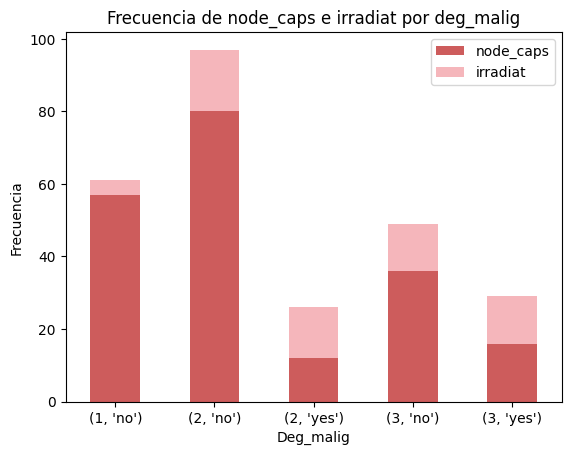

In [ ]:
conn = mysql.connector.connect(user="root", password="", host="localhost", database="Proyecto_Gestion_BD_1")
cursor = conn.cursor()

try:
    if conn.is_connected():        
        query = "SELECT deg_malig, node_caps, irradiat FROM proyect_BD"        
        cursor.execute(query)
        data = cursor.fetchall()
        df = pd.DataFrame(data, columns=['deg_malig', 'node_caps', 'irradiat'])        
        grouped_data = df.groupby('deg_malig')[['node_caps', 'irradiat']].apply(lambda x: x.astype(str).value_counts()).unstack().fillna(0)       
        rgba_colors = [(205/255, 92/255, 92/255), (245/255, 182/255, 187/255) ]  
        ax = grouped_data.plot(kind='bar', stacked=True, color=rgba_colors)
        ax.set_title('Frecuencia de node_caps e irradiat por deg_malig')
        ax.set_xlabel('Deg_malig')
        ax.set_ylabel('Frecuencia')
        ax.set_xticklabels(grouped_data.index, rotation=0)  
        ax.legend(labels=['node_caps', 'irradiat'])  
        plt.show()

except mysql.connector.Error as err:
    print("Error:", err)

finally:
    if conn.is_connected():
        conn.close()


## Distribucion de deg_malig en la variable clase (recurrencia)

c:\Users\Pc\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Pc\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Pc\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Pc\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will 

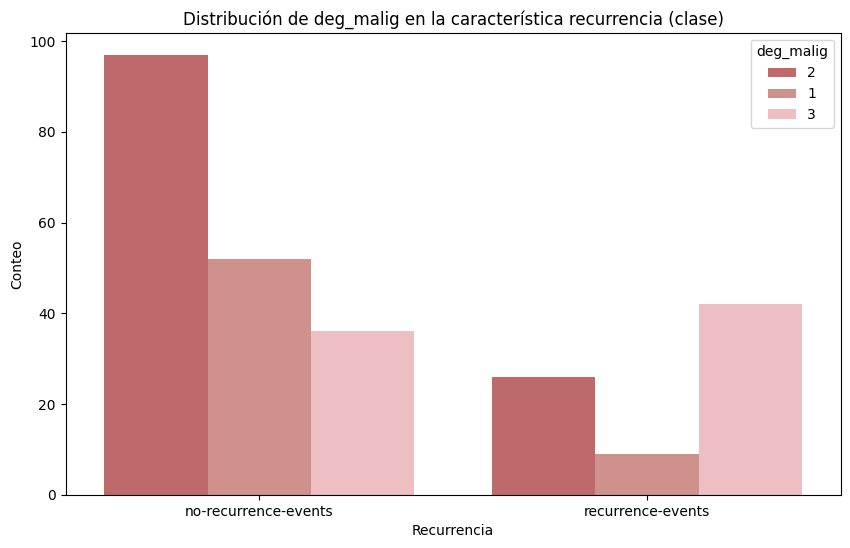

In [8]:
custom_palette = {'1': '#D98880', '2': '#CD5C5C', '3': '#F5B6BB'}

conn = mysql.connector.connect(user="root", password="", host="localhost", database="Proyecto_Gestion_BD_1")
cursor = conn.cursor()

try:
    query = "SELECT Class, CAST(deg_malig AS CHAR) AS deg_malig FROM proyect_BD"  
    cursor.execute(query)
    
    columns = ['Class', 'deg_malig']
    data = cursor.fetchall()
    df = pd.DataFrame(data, columns=columns)
    
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x='Class', hue='deg_malig', palette=custom_palette)
    plt.title('Distribución de deg_malig en la característica recurrencia (clase)')
    plt.xlabel('Recurrencia')
    plt.ylabel('Conteo')
    plt.show()

except mysql.connector.Error as err:
    print("Error:", err)

finally:
    if conn.is_connected():
        conn.close()


## DIagrama de tortas de dsitribucion de variable breas con deg_malig = 3 

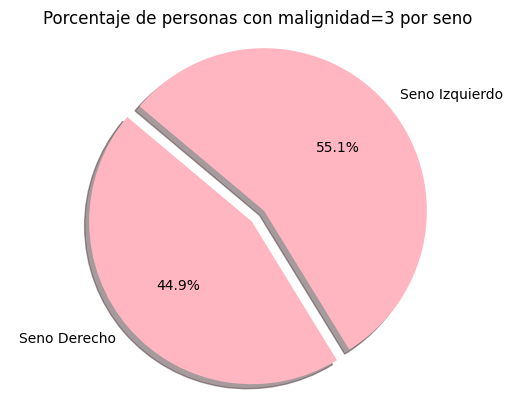

In [3]:
conn = mysql.connector.connect(user="root", password="", host="localhost", database="Proyecto_Gestion_BD_1")
cursor = conn.cursor()
try:
    if conn.is_connected():
        cursor = conn.cursor()

        
        cursor.execute("SELECT COUNT(*) FROM proyect_BD WHERE deg_malig=3 AND breast='right'")
        total_derecho = cursor.fetchone()[0]

        
        cursor.execute("SELECT COUNT(*) FROM proyect_BD WHERE deg_malig=3 AND breast='left'")
        total_izquierdo = cursor.fetchone()[0]

        
        total_personas = total_derecho + total_izquierdo
        porcentaje_derecho = (total_derecho / total_personas) * 100
        porcentaje_izquierdo = (total_izquierdo / total_personas) * 100

        
        labels = ['Seno Derecho', 'Seno Izquierdo']
        sizes = [porcentaje_derecho, porcentaje_izquierdo]
        colors = ['lightpink', 'lightpink']
        explode = (0.1, 0)  # Explode first slice
        plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
        plt.axis('equal')  
        plt.title('Porcentaje de personas con malignidad=3 por seno')
        plt.show()

except mysql.connector.Error as err:
    print("Error:", err)

finally:
    
    if conn.is_connected():
        conn.close()

# Consultas SQL (CRUD) para simular la manipulación de la base de datos
En esta etapa se realizarán diverso llamados a la base de datos para simular su manipulacion en tiempo real. 

## Create:
Se crea un nuevo paciente.

In [ ]:
conn = mysql.connector.connect(user="root", password="", host="localhost", database="Proyecto_Gestion_BD_1")
cursor = conn.cursor()

try:    
    query = "INSERT INTO proyect_BD (age, menopause, tumor_size, inv_nodes, node_caps, deg_malig, breast, breast_quad, irradiat) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s)"
   
    age = "30-39"
    menopause = "premeno"
    tumor_size = "30-34"
    inv_nodes = "0-2"
    node_caps = "no"
    deg_malig = 2
    breast = "left"
    breast_quad = "left_low"
    irradiat = "no"

    cursor.execute(query, (age, menopause, tumor_size, inv_nodes, node_caps, deg_malig, breast, breast_quad, irradiat))
    conn.commit()

    print("Registro insertado correctamente.")

except mysql.connector.Error as err:
    print("Error al insertar el registro:", err)

finally:
    cursor.close()
    conn.close()


Registro insertado correctamente.


## Read:
Se busca los pacientes con un deg_malig=3 

In [ ]:
conn = mysql.connector.connect(user="root", password="", host="localhost", database="Proyecto_Gestion_BD_1")
cursor = conn.cursor()

try:    
    query = "SELECT * FROM proyect_BD WHERE deg_malig = 3"
    cursor.execute(query)   
    result = cursor.fetchall()    
    for row in result:
        print(row)
        
except mysql.connector.Error as err:
    
    print("Error al ejecutar la consulta:", err)

finally:
    
    cursor.close()
    conn.close()

(10, 'no-recurrence-events', 40, 'premeno', '0-4', '0-2', 'no', 3, 'left', 'central', 'no')
(13, 'no-recurrence-events', 50, 'ge40', '25-29', '0-2', 'no', 3, 'left', 'right_up', 'no')
(14, 'no-recurrence-events', 40, 'premeno', '30-34', '0-2', 'no', 3, 'left', 'left_up', 'no')
(17, 'no-recurrence-events', 50, 'premeno', '30-34', '0-2', 'no', 3, 'left', 'left_low', 'no')
(18, 'no-recurrence-events', 60, 'ge40', '30-34', '0-2', 'no', 3, 'left', 'left_low', 'no')
(26, 'no-recurrence-events', 60, 'ge40', '25-29', '0-2', 'no', 3, 'right', 'left_up', 'no')
(29, 'no-recurrence-events', 50, 'ge40', '40-44', '0-2', 'no', 3, 'right', 'left_up', 'no')
(31, 'no-recurrence-events', 50, 'premeno', '10-14', '0-2', 'no', 3, 'left', 'left_low', 'no')
(52, 'no-recurrence-events', 70, 'ge40', '20-24', '0-2', 'no', 3, 'left', 'left_up', 'no')
(66, 'no-recurrence-events', 50, 'ge40', '20-24', '0-2', 'no', 3, 'left', 'left_up', 'no')
(67, 'no-recurrence-events', 50, 'ge40', '35-39', '0-2', 'no', 3, 'left', 

## Update:
Se actualiza el valor de deg_malig del ultimo paciente agregado haciendo uso del id 

In [ ]:
conn = mysql.connector.connect(user="root", password="", host="localhost", database="Proyecto_Gestion_BD_1")
cursor = conn.cursor()

try:
    cursor.execute("SELECT MAX(id) FROM proyect_BD")
    ultimo_id = cursor.fetchone()[0]    
    query = "UPDATE proyect_BD SET deg_malig = %s WHERE id = %s"    
    nuevo_deg_malig = 1  
    cursor.execute(query, (nuevo_deg_malig, ultimo_id))    
    conn.commit()

   
    print("Actualización exitosa")

except mysql.connector.Error as err:
    
    print("Error al actualizar los datos:", err)

finally:
    
    cursor.close()
    conn.close()


Actualización exitosa


## Delete:

In [ ]:
conn = mysql.connector.connect(user="root", password="", host="localhost", database="Proyecto_Gestion_BD_1")
cursor = conn.cursor()

try:
   
    id_a_eliminar = 1     
    query = f"DELETE FROM proyect_BD WHERE id = {id_a_eliminar}"
    cursor.execute(query)
    conn.commit()    
    print("Registro eliminado correctamente.")

except mysql.connector.Error as err:
    print("Error:", err)
    conn.rollback()

finally:
    
    cursor.close()
    conn.close()

Registro eliminado correctamente.


# Creacion de archivo .db con informacion de la abse de datos 

In [9]:
conn = mysql.connector.connect(user="root", password="", host="localhost", database="Proyecto_Gestion_BD_1")
cursor = conn.cursor()
try:
    if conn.is_connected():
        cursor = conn.cursor()

        
        cursor.execute("DESCRIBE proyect_BD")
        columnas = cursor.fetchall()
        nombres_columnas = [columna[0] for columna in columnas]

        
        cursor.execute("SELECT * FROM proyect_BD")
        datos = cursor.fetchall()

        
        with open('backup.db', 'w') as archivo_db:
            
            archivo_db.write(','.join(nombres_columnas) + '\n')

            
            for fila in datos:
                archivo_db.write(','.join(map(str, fila)) + '\n')

        print("Datos guardados en backup.bd")

except mysql.connector.Error as err:
    print("Error:", err)

finally:
    
    if conn.is_connected():
        conn.close()

Datos guardados en backup.bd
